In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import json

def eval_retrieval(queries, k=5):
    data = []

    for q in queries:
        top_k = retrieve(q["text"], k=k)
        true_id = q["true_case_id"]

        # Binary label: 1 jika benar ada di top-k, 0 jika tidak
        y_true = [1]
        y_pred = [1 if true_id in top_k else 0]

        data.append({
            "query_id": q["query_id"],
            "y_true": y_true[0],
            "y_pred": y_pred[0]
        })

    df = pd.DataFrame(data)

    # Hitung metrik
    acc = accuracy_score(df["y_true"], df["y_pred"])
    prec = precision_score(df["y_true"], df["y_pred"], zero_division=0)
    rec = recall_score(df["y_true"], df["y_pred"], zero_division=0)
    f1 = f1_score(df["y_true"], df["y_pred"], zero_division=0)

    # Simpan ke CSV
    os.makedirs("data/eval", exist_ok=True)
    df.to_csv("data/eval/retrieval_metrics.csv", index=False)

    print("== Retrieval Evaluation ==")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [ ]:
def eval_prediction(queries, case_solutions):
    data = []

    for q in queries:
        true_sol = case_solutions[q["true_case_id"]]
        predicted_sol = predict_outcome(q["text"])

        label_true = true_sol.strip().lower()
        label_pred = predicted_sol.strip().lower()

        data.append({
            "query_id": q["query_id"],
            "y_true": label_true,
            "y_pred": label_pred
        })

    df = pd.DataFrame(data)

    # Konversi label jadi kategori unik
    labels = list(set(df["y_true"]) | set(df["y_pred"]))
    acc = accuracy_score(df["y_true"], df["y_pred"])
    prec = precision_score(df["y_true"], df["y_pred"], average='macro', zero_division=0)
    rec = recall_score(df["y_true"], df["y_pred"], average='macro', zero_division=0)
    f1 = f1_score(df["y_true"], df["y_pred"], average='macro', zero_division=0)

    # Simpan ke CSV
    df.to_csv("data/eval/prediction_metrics.csv", index=False)

    print("\n== Prediction Evaluation ==")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [ ]:
# Load data
with open("data/eval/queries.json") as f:
    test_queries = json.load(f)

# Panggil evaluasi
eval_retrieval(test_queries, k=5)
eval_prediction(test_queries, case_solutions)

== Retrieval Evaluation ==
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

== Prediction Evaluation ==
Accuracy: 0.5000
Precision: 0.3750
Recall: 0.3750
F1 Score: 0.3750


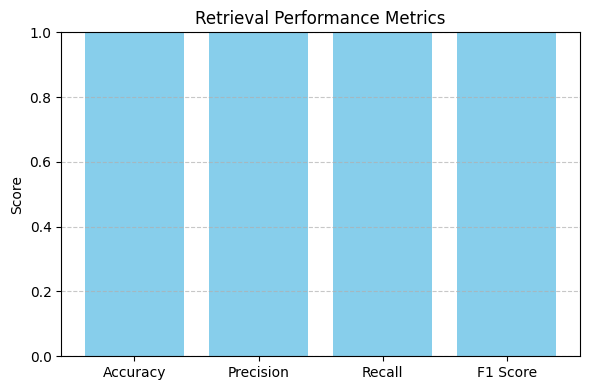

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load hasil retrieval
df_retrieval = pd.read_csv("data/eval/retrieval_metrics.csv")

# Hitung metrik agregat
acc = accuracy_score(df_retrieval["y_true"], df_retrieval["y_pred"])
prec = precision_score(df_retrieval["y_true"], df_retrieval["y_pred"], zero_division=0)
rec = recall_score(df_retrieval["y_true"], df_retrieval["y_pred"], zero_division=0)
f1 = f1_score(df_retrieval["y_true"], df_retrieval["y_pred"], zero_division=0)

# Plot
plt.figure(figsize=(6,4))
plt.bar(["Accuracy", "Precision", "Recall", "F1 Score"], [acc, prec, rec, f1], color="skyblue")
plt.ylim(0, 1)
plt.title("Retrieval Performance Metrics")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("data/eval/retrieval_metrics_chart.png")
plt.show()


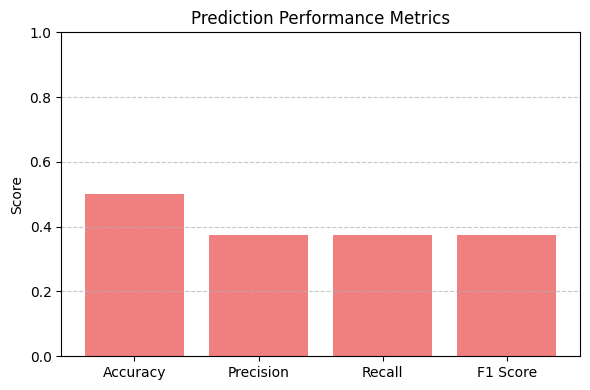

In [ ]:
# Load hasil prediction
df_pred = pd.read_csv("data/eval/prediction_metrics.csv")

# Hitung metrik agregat
acc_pred = accuracy_score(df_pred["y_true"], df_pred["y_pred"])
prec_pred = precision_score(df_pred["y_true"], df_pred["y_pred"], average='macro', zero_division=0)
rec_pred = recall_score(df_pred["y_true"], df_pred["y_pred"], average='macro', zero_division=0)
f1_pred = f1_score(df_pred["y_true"], df_pred["y_pred"], average='macro', zero_division=0)

# Plot
plt.figure(figsize=(6,4))
plt.bar(["Accuracy", "Precision", "Recall", "F1 Score"], [acc_pred, prec_pred, rec_pred, f1_pred], color="lightcoral")
plt.ylim(0, 1)
plt.title("Prediction Performance Metrics")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("data/eval/prediction_metrics_chart.png")
plt.show()


In [ ]:
import pandas as pd

# Baca ulang hasil prediksi
df_pred = pd.read_csv("data/eval/prediction_metrics.csv")

# Tampilkan prediksi yang salah
for i, row in df_pred.iterrows():
    if row["y_true"] != row["y_pred"]:
        print(f"Query ID: {row['query_id']}")
        print(f"True    : {row['y_true']}")
        print(f"Pred    : {row['y_pred']}\n")


Query ID: 0
True    : menyatakan terdakwa ulis dewi purwanti,s.pd. terbukti secara sah danmeyakinkan bersalah melakukan “tindak pidana korupsi secara bersama-sama” sebagaimana dalam dakwaan alternatif kedua penuntut umum. selain itu, menjatuhkan pidana penjara kepada terdakwa oleh karena itu selama 1 (satu)tahun 9 (sembilan) bulan, dan pidana denda sebesar rp50. 000. 000,00 ( limapuluh juta rupiah ) dengan ketentuan apabila denda tersebut tidak dibayardiganti dengan pidana kurungan selama 1 (satu) bulan. selanjutnya, menghukum terdakwa untuk membayar uang pengganti sejumlah rp89. 925. 000,00 (delapan puluh sembilan juta sembilan ratus dua puluh limaribu rupiah) dirampas untuk negara selanjutnya dikembalikan kepada 51 (limapuluh satu) saksi korban pungutan liar di desa kletek kecamatan taman kabupaten sidoarjo secara proporsional, paling lama dalam 1 (satu) bulansesudah putusan ini berkekuatan hukum tetap, jika tidak membayar makaharta bendanya disita dan dilelang oleh jaksa untuk menut